In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Read data via pandas

In [2]:
df = pd.read_csv('House Prediction Data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
df.shape

(2919, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

This dataset has 2919 rows and 81 columns.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


The table lists basic statistics for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Through the information of the dataset, it can be seen that many features contain null values

### data preprocessing

In [7]:
no_null = df.isnull().sum()
no_null.sort_values(ascending=False) #sorted from high to low

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
HeatingQC          0
Length: 81, dtype: int64

There are 6 features in this data that contain more than 1000 null values, one of which is the target information, only delete the null value row operation, it cannot be deleted.

In [8]:
no_null[no_null>1000].index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')

List those feature names that contain more than 1000 null values

In [9]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','Id', 'MiscVal'], axis=1, inplace=True)

Since the Id feature is not related to the target information, the deletion operation is also performed; MiscVal is the value of MiscFeature, so when MiscFeature is deleted, MiscVal has no reason to exist.

In [10]:
df.dropna(subset = ["SalePrice"], inplace=True)

Delete the empty value row of the label information, which cannot be populated because the label information is the target value.

In [11]:
def imputer(data):
    data = data.fillna(method='ffill')
    return data
df = imputer(df)

Use the forward fill that comes with pandas to fill in the null values of other features

### Data Exploratory Analysis

In [12]:
df_numerical = df.select_dtypes(['float64', 'int64'])
df_categorical = df.select_dtypes('object')

Divide the original dataset into numeric datasets and categorical datasets according to their data types

In [13]:
corr = df_numerical.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474526
Fireplaces       0.466929
GarageYrBlt      0.454619
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.298490
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


For the correlation coefficient of each feature and label information, only those features with coefficients greater than 0.5 are selected for subsequent analysis.

C:\Users\finng\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\finng\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\finng\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\finng\Anacond

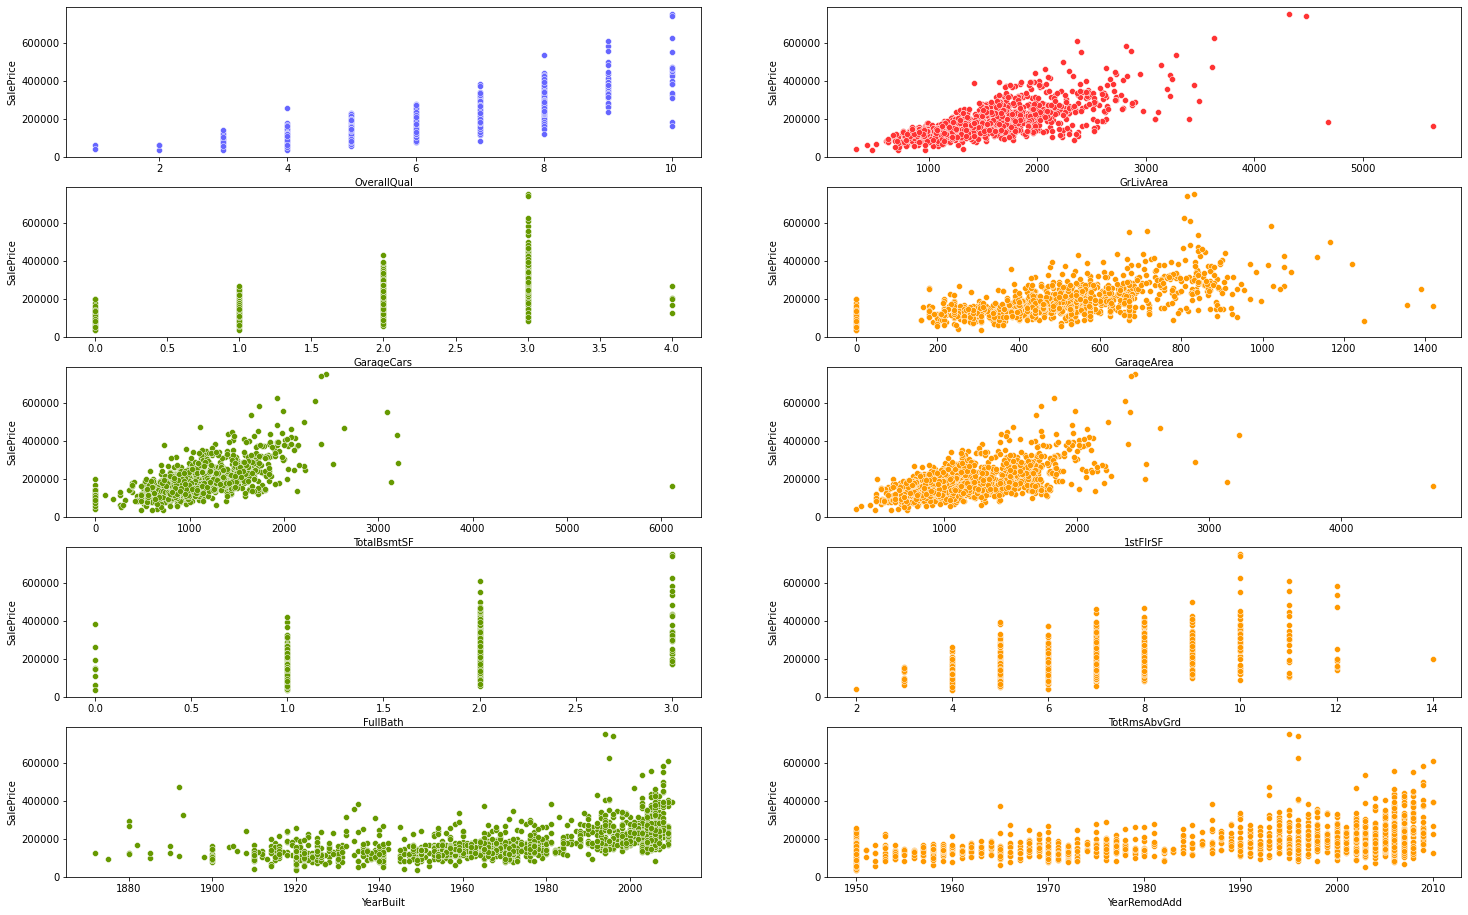

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(25,16))
sns.scatterplot(df['OverallQual'],df['SalePrice'],color='#6666FF', ax=ax[0][0])
sns.scatterplot(df['GrLivArea'],df['SalePrice'],color='#FF3333',ax=ax[0][1])
sns.scatterplot(df['GarageCars'],df['SalePrice'],color='#669900',ax=ax[1][0])
sns.scatterplot(df['GarageArea'],df['SalePrice'],color='#FF9900',ax=ax[1][1])
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'],color='#669900',ax=ax[2][0])
sns.scatterplot(df['1stFlrSF'],df['SalePrice'],color='#FF9900',ax=ax[2][1])
sns.scatterplot(df['FullBath'],df['SalePrice'],color='#669900',ax=ax[3][0])
sns.scatterplot(df['TotRmsAbvGrd'],df['SalePrice'],color='#FF9900',ax=ax[3][1])
sns.scatterplot(df['YearBuilt'],df['SalePrice'],color='#669900',ax=ax[4][0])
sns.scatterplot(df['YearRemodAdd'],df['SalePrice'],color='#FF9900',ax=ax[4][1])
plt.show()

In [15]:
col_names = df_categorical.columns
copied = df_categorical.copy()
for i in col_names:
    label_encoder = LabelEncoder()
    copied[i] = label_encoder.fit_transform(copied[i])
copied = pd.concat([copied, df['SalePrice']], axis=1)

corr = copied.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
GarageCond       0.141200
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
GarageQual       0.112478
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
BsmtCond         0.066997
LandSlope        0.051152
Street           0.041036
BsmtFinType2     0.036981
LandContour      0.015453
MasVnrType       0.013363
Condition2       0.007513
Utilities       -0.014314
SaleType        -0.054911
BsmtFinType1    -0.062186
LotConfig       -0.067396
BldgType        -0.085591
Heating         -0.098812
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.281629
GarageType      -0.340342
HeatingQC       -0.400178
GarageFinish    -0.487056
KitchenQual     -0.589189
BsmtQual        -0.592098
ExterQual   

First, copy an identical dataset with only categorical data and perform an encoding operation to obtain the correlation coefficient. Only features with coefficients higher than 0.15 are selected.

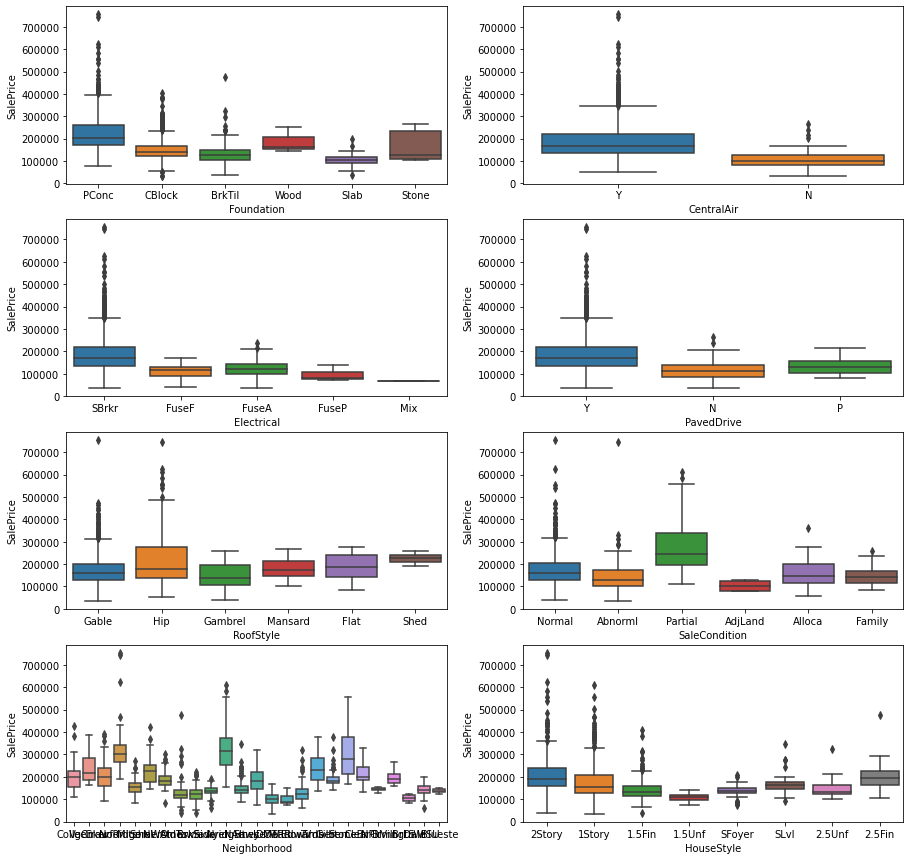

In [16]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(['Foundation', 'CentralAir', 'Electrical', 'PavedDrive',
                         'RoofStyle', 'SaleCondition', 'Neighborhood', 'HouseStyle'], ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

C:\Users\finng\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

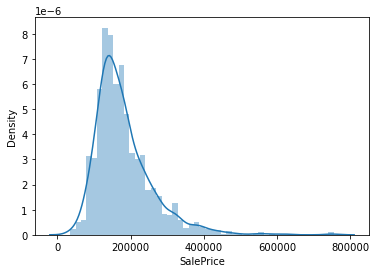

In [17]:
sns.distplot(df['SalePrice'])

It can be seen from the above figure that the target information, that is, the housing price is basically a normal distribution.

In [18]:
print('skewness: {:.3f}'.format(df['SalePrice'].skew()))
print('kurtosis: {:.3f}'.format(df['SalePrice'].kurt()))

skewness: 1.883
kurtosis: 6.536


Kurtosis: Kurtosis is a statistic that describes the steepness of the distribution of all values of a variable; the kurtosis is greater than 0, which is steeper than the peak of the normal distribution.
Skewness: Skewness is a statistic that describes the symmetry of the value distribution of a variable; if the value is greater than 0, the positive deviation value is large, which is positive or right-skewed, and the long tail is dragging to the right.

C:\Users\finng\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

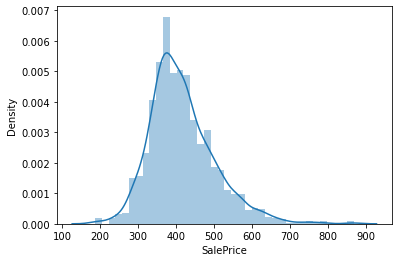

In [19]:
df['SalePrice'] = np.sqrt(df['SalePrice'])
sns.distplot(df['SalePrice'])

By taking the square root of the house price data, a more uniform normal distribution is obtained.

In [20]:
print('skewness: {:.3f}'.format(df['SalePrice'].skew()))
print('kurtosis: {:.3f}'.format(df['SalePrice'].kurt()))

skewness: 0.943
kurtosis: 1.958


Both kurtosis and skewness are greatly reduced

In [21]:
features = ['Foundation', 'CentralAir', 'Electrical', 'PavedDrive', 'RoofStyle',
            'SaleCondition', 'Neighborhood', 'HouseStyle', 'OverallQual','GrLivArea',
            'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',
            'YearBuilt','YearRemodAdd','SalePrice']
df = df[features]
colname = df.select_dtypes('object').columns
for i in colname:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])
df[:5]

,Foundation,CentralAir,Electrical,PavedDrive,RoofStyle,SaleCondition,Neighborhood,HouseStyle,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,2,1,4,2,1,4,5,5,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,456.618002
1,1,1,4,2,1,4,24,2,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,426.028168
2,2,1,4,2,1,4,5,5,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,472.757866
3,0,1,4,2,1,0,6,5,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,374.165739
4,2,1,4,2,1,4,15,5,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,500.000000


Finally, the category data is encoded to prepare for the subsequent modeling.

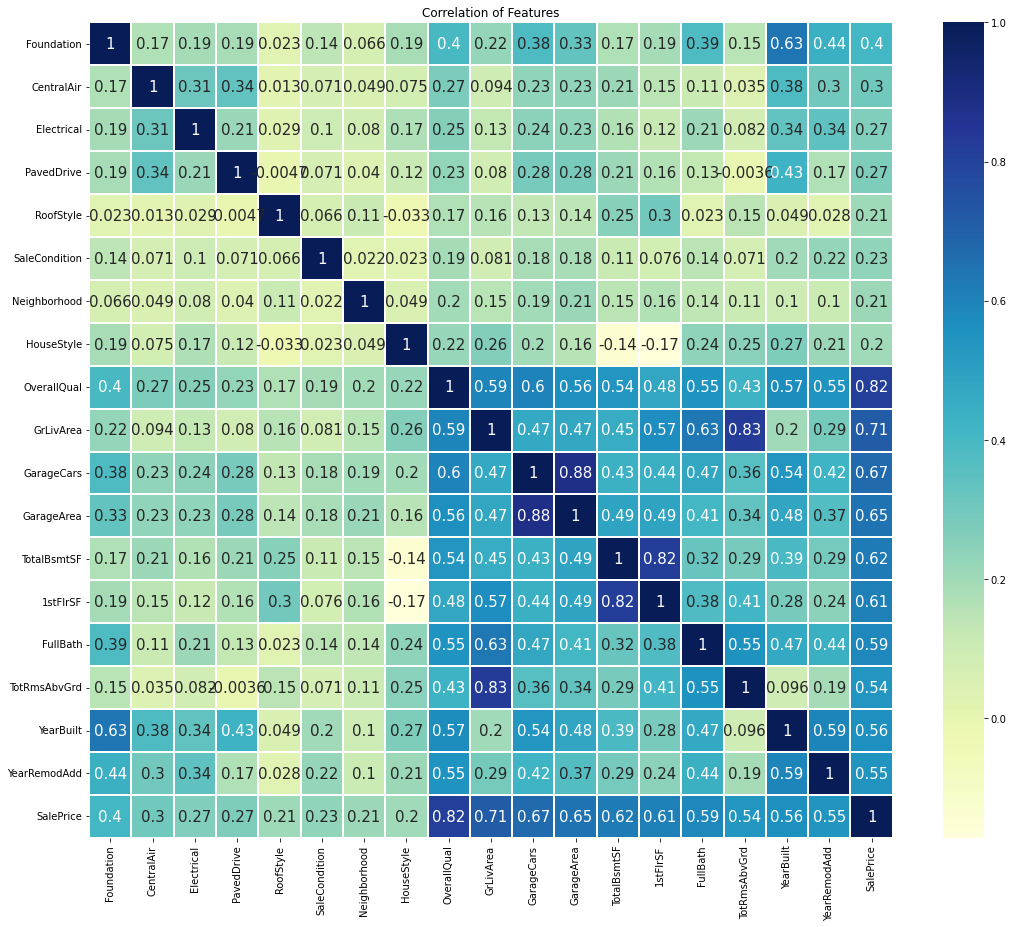

In [22]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":15})
plt.title("Correlation of Features")
plt.show()

### modeling

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
lr = LinearRegression()
rfr = RandomForestRegressor(criterion='squared_error', max_depth=8,
                            max_features='auto', min_samples_leaf=10)

# fit training data
lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

# get predicted value
lr_pred = lr.predict(X_test)
rfr_pred = rfr.predict(X_test)

# Model performance evaluation
print('Linear regression model: ')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('MSE: ', mean_squared_error(y_test, lr_pred))
print('R-squared: ', r2_score(y_test, lr_pred))
print(' ')
print('Random forest regression model: ')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, rfr_pred)))
print('MSE: ', mean_squared_error(y_test, rfr_pred))
print('R-squared: ', r2_score(y_test, rfr_pred))

Linear regression model: 
RMSE:  42.77243000377719
MSE:  1829.4807684280192
R-squared:  0.7568604062905525
 
Random forest regression model: 
RMSE:  32.810546323354195
MSE:  1076.5319500369717
R-squared:  0.8569279625868191


From the data obtained from model evaluation, random forest has higher regression prediction ability.

In [26]:
def plot(pred, title):
    plt.figure(figsize=(10,8))
    plt.plot([i for i in range(len(y_test))], y_test, label='actual values')
    plt.plot([i for i in range(len(y_test))], pred, label='actual values')
    plt.title(title)
    plt.legend()
    plt.show()

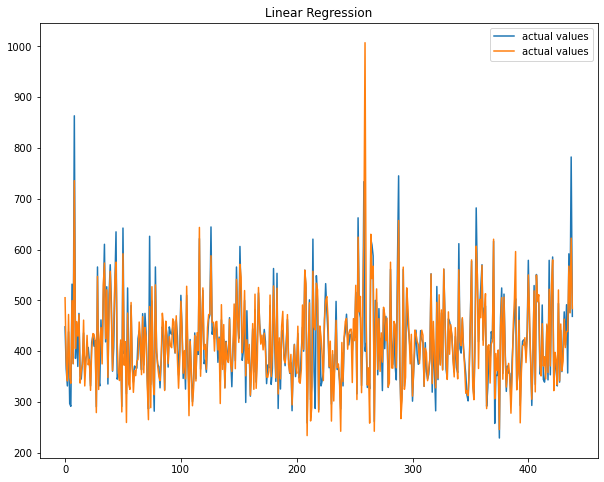

In [27]:
plot(lr_pred, 'Linear Regression')

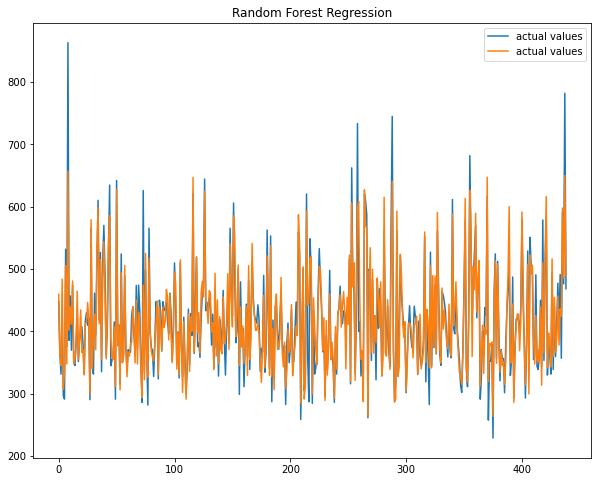

In [28]:
plot(rfr_pred, 'Random Forest Regression')